In [1]:
import scipy, time, random, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import confusion_matrix, accuracy_score 




# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.data_parser import *
from common.misc import *
import companies_data_preprocessor
from common.model_trainer import ModelTrainer

df = parse_companies(5)#.sample(100)
raw_data, labels = companies_data_preprocessor.preprocess(df)

Total time for MLP: 131.7495756149292


<Figure size 432x288 with 0 Axes>

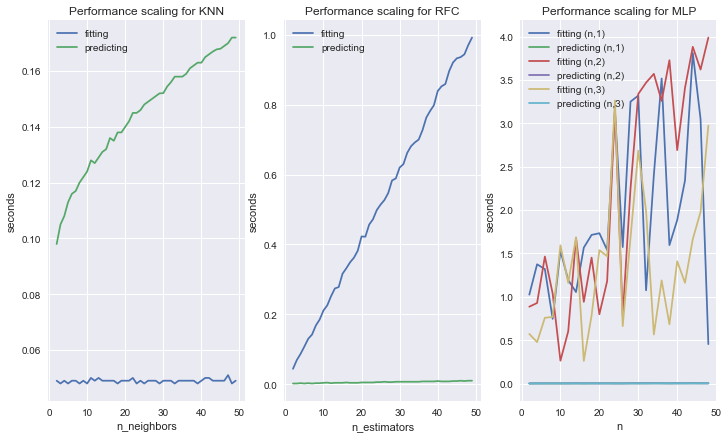

In [2]:
plt.subplots_adjust(right=5)
plt.style.use('seaborn')

# Simple Imputation with 0
preprocessed_data = pd.DataFrame(SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0).fit_transform(raw_data))


x_train, x_test, y_train, y_test = train_test_split(preprocessed_data, labels, test_size=0.3, random_state=1)
w,l = 15, 6

plt.figure(figsize=(w,l))
plt.subplot(131)

fit_times = []
predict_times = []
n_vals = [n for n in range(2,50)]
for n in n_vals:
    model = KNN(n_neighbors=n, weights="uniform")
    
    # Fitting
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()
    fit_times.append(end_time - start_time)

    # Predicting
    start_time = time.time()
    model.predict(x_test)
    end_time = time.time()
    predict_times.append(end_time - start_time)


plt.plot(n_vals, fit_times, label="fitting")
plt.plot(n_vals, predict_times, label="predicting")
plt.ylabel("seconds")
plt.title("Performance scaling for KNN")
plt.xlabel("n_neighbors")
plt.legend()



plt.subplot(132)

fit_times = []
predict_times = []
n_vals = [n for n in range(2,50)]
for n in n_vals:
    model = RFC(n_estimators=n, criterion="entropy")
    
    # Fitting
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()
    fit_times.append(end_time - start_time)

    # Predicting
    start_time = time.time()
    model.predict(x_test)
    end_time = time.time()
    predict_times.append(end_time - start_time)

plt.plot(n_vals, fit_times, label="fitting")
plt.plot(n_vals, predict_times, label="predicting")
plt.ylabel("seconds")
plt.xlabel("n_estimators")
plt.title("Performance scaling for RFC")
plt.legend()


mlp_start = time.time()
plt.subplot(133)
fit_times = []
predict_times = []
n_vals = list(range(2,50,2))
for m in range(1,4):
    fit_times.clear()
    predict_times.clear()
    for n in n_vals:    
        model = MLP(hidden_layer_sizes=(n,m))
        
        # Fitting
        start_time = time.time()
        model.fit(x_train, y_train)
        end_time = time.time()
        fit_times.append(end_time - start_time)

        # Predicting
        start_time = time.time()
        model.predict(x_test)
        end_time = time.time()
        predict_times.append(end_time - start_time)

    plt.plot(n_vals, fit_times, label="fitting (n,%s)" % (m))
    plt.plot(n_vals, predict_times, label="predicting (n,%s)" % (m))
mlp_end = time.time()
print("Total time for MLP:", mlp_end - mlp_start)
plt.ylabel("seconds")
plt.xlabel("n")
plt.title("Performance scaling for MLP")
plt.legend()



plt.savefig("out/performance_comparison")
plt.show()